# Techncolabs Internship

## Project - Predicting Flight Delay Based On Local Weather Data

### Introduction
 - Commercial airlines are a backbone of the worldwide transportation system, bringing significant socioeconomic utility by enabling cheaper and easier long distance travel. After more than half a century of mainstream adoption (especially in the US), airline operations have seen major optimizations, and today function with excellent reliability even in the face of onerous engineering challenges.
 - Still, the modern passenger is occasionally inconvenienced by aircraft delays, disrupting an otherwise exacting system and causing significant inefficiencies at scale in 2007, 23% of US flights were more than 15 minutes late to depart (federal definition of flight delay), levying an aggregate cost of $32.9bn
 - suggesting that better understanding of aircraft unfriendly weather could improve airline scheduling and significantly reduce delays.

### Dataset and Features
The US Bureau of Transport Statistics provides data on all domestic flights, including their scheduled and actual departure and takeoff times, date, origin, destination and carrier. We combined this with Local Climatological Data from NOAA to form a joined dataset that includes the closest available weather data at the departure airport along with the standard flight data.
The departure airport weather features include temperature, humidity, air pressure, and precipitation type and amount.

# Reading and Understanding Data

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [3]:
flight_df = pd.read_csv("flights.csv")
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
flight_df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

# Find out Missing Percentage of each feature
## Drop the columns having missing percentage greater than 40%

In [6]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((flight_df.isnull().sum()  / flight_df.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [7]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
CANCELLATION_REASON,98.455
WEATHER_DELAY,81.725
LATE_AIRCRAFT_DELAY,81.725
AIRLINE_DELAY,81.725
SECURITY_DELAY,81.725
AIR_SYSTEM_DELAY,81.725
AIR_TIME,1.806
ARRIVAL_DELAY,1.806
ELAPSED_TIME,1.806
WHEELS_ON,1.590


In [8]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index

Index(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], dtype='object')

In [9]:
# drop the columns which having more than 40% missing values
flight_df=flight_df.drop(columnstodrop.index,axis=1)

In [10]:
# check the missing value percentage 
df_missing=pd.DataFrame((flight_df.isnull().sum()  / flight_df.shape[0] *100).round(3),columns=['Percentage'])
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
ELAPSED_TIME,1.806
ARRIVAL_DELAY,1.806
AIR_TIME,1.806
ARRIVAL_TIME,1.590
TAXI_IN,1.590
WHEELS_ON,1.590
TAXI_OUT,1.530
WHEELS_OFF,1.530
DEPARTURE_TIME,1.481
DEPARTURE_DELAY,1.481


In [11]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [12]:
flight_df.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [13]:
flight_df.TAIL_NUMBER.mode()

0    N480HA
dtype: object

# EDA

In [14]:
flight_df['TAIL_NUMBER'].fillna('N480HA',inplace=True)

In [15]:
flight_df.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [16]:
#FILLNA USING COLUMNS MEAN
#flight_df.fillna(flight_df.mean(),inplace=True)

In [17]:
flight_df['DEPARTURE_TIME'].fillna(flight_df['SCHEDULED_DEPARTURE'],inplace=True)

In [18]:
flight_df['DEPARTURE_DELAY'].fillna(flight_df['DEPARTURE_DELAY'].mean(),inplace=True)

In [19]:
flight_df['TAXI_OUT'].fillna(flight_df['TAXI_OUT'].mean(),inplace=True)

In [20]:
flight_df['WHEELS_OFF'].fillna(flight_df['WHEELS_OFF'].mean(),inplace=True)

In [21]:
flight_df['SCHEDULED_TIME'].fillna(flight_df['SCHEDULED_TIME'],inplace=True)

In [22]:
flight_df['ELAPSED_TIME'].fillna(flight_df['ELAPSED_TIME'].mean(),inplace=True)

In [23]:
flight_df['AIR_TIME'].fillna(flight_df['AIR_TIME'].mean(),inplace=True)

In [24]:
flight_df['WHEELS_ON'].fillna(flight_df['WHEELS_ON'].mean(),inplace=True)

In [25]:
flight_df['TAXI_IN'].fillna(flight_df['TAXI_IN'].mean(),inplace=True)

In [26]:
flight_df['ARRIVAL_TIME'].fillna(flight_df['SCHEDULED_ARRIVAL'],inplace=True)

In [27]:
flight_df['ARRIVAL_DELAY'].fillna(flight_df['ARRIVAL_DELAY'].mean(),inplace=True)

In [28]:
flight_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         6
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [29]:
flight_df['DATE'] = ''
flight_df['DATE'] = pd.to_datetime(flight_df[['YEAR', 'MONTH', 'DAY']])

In [30]:
flight_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,2015-12-31


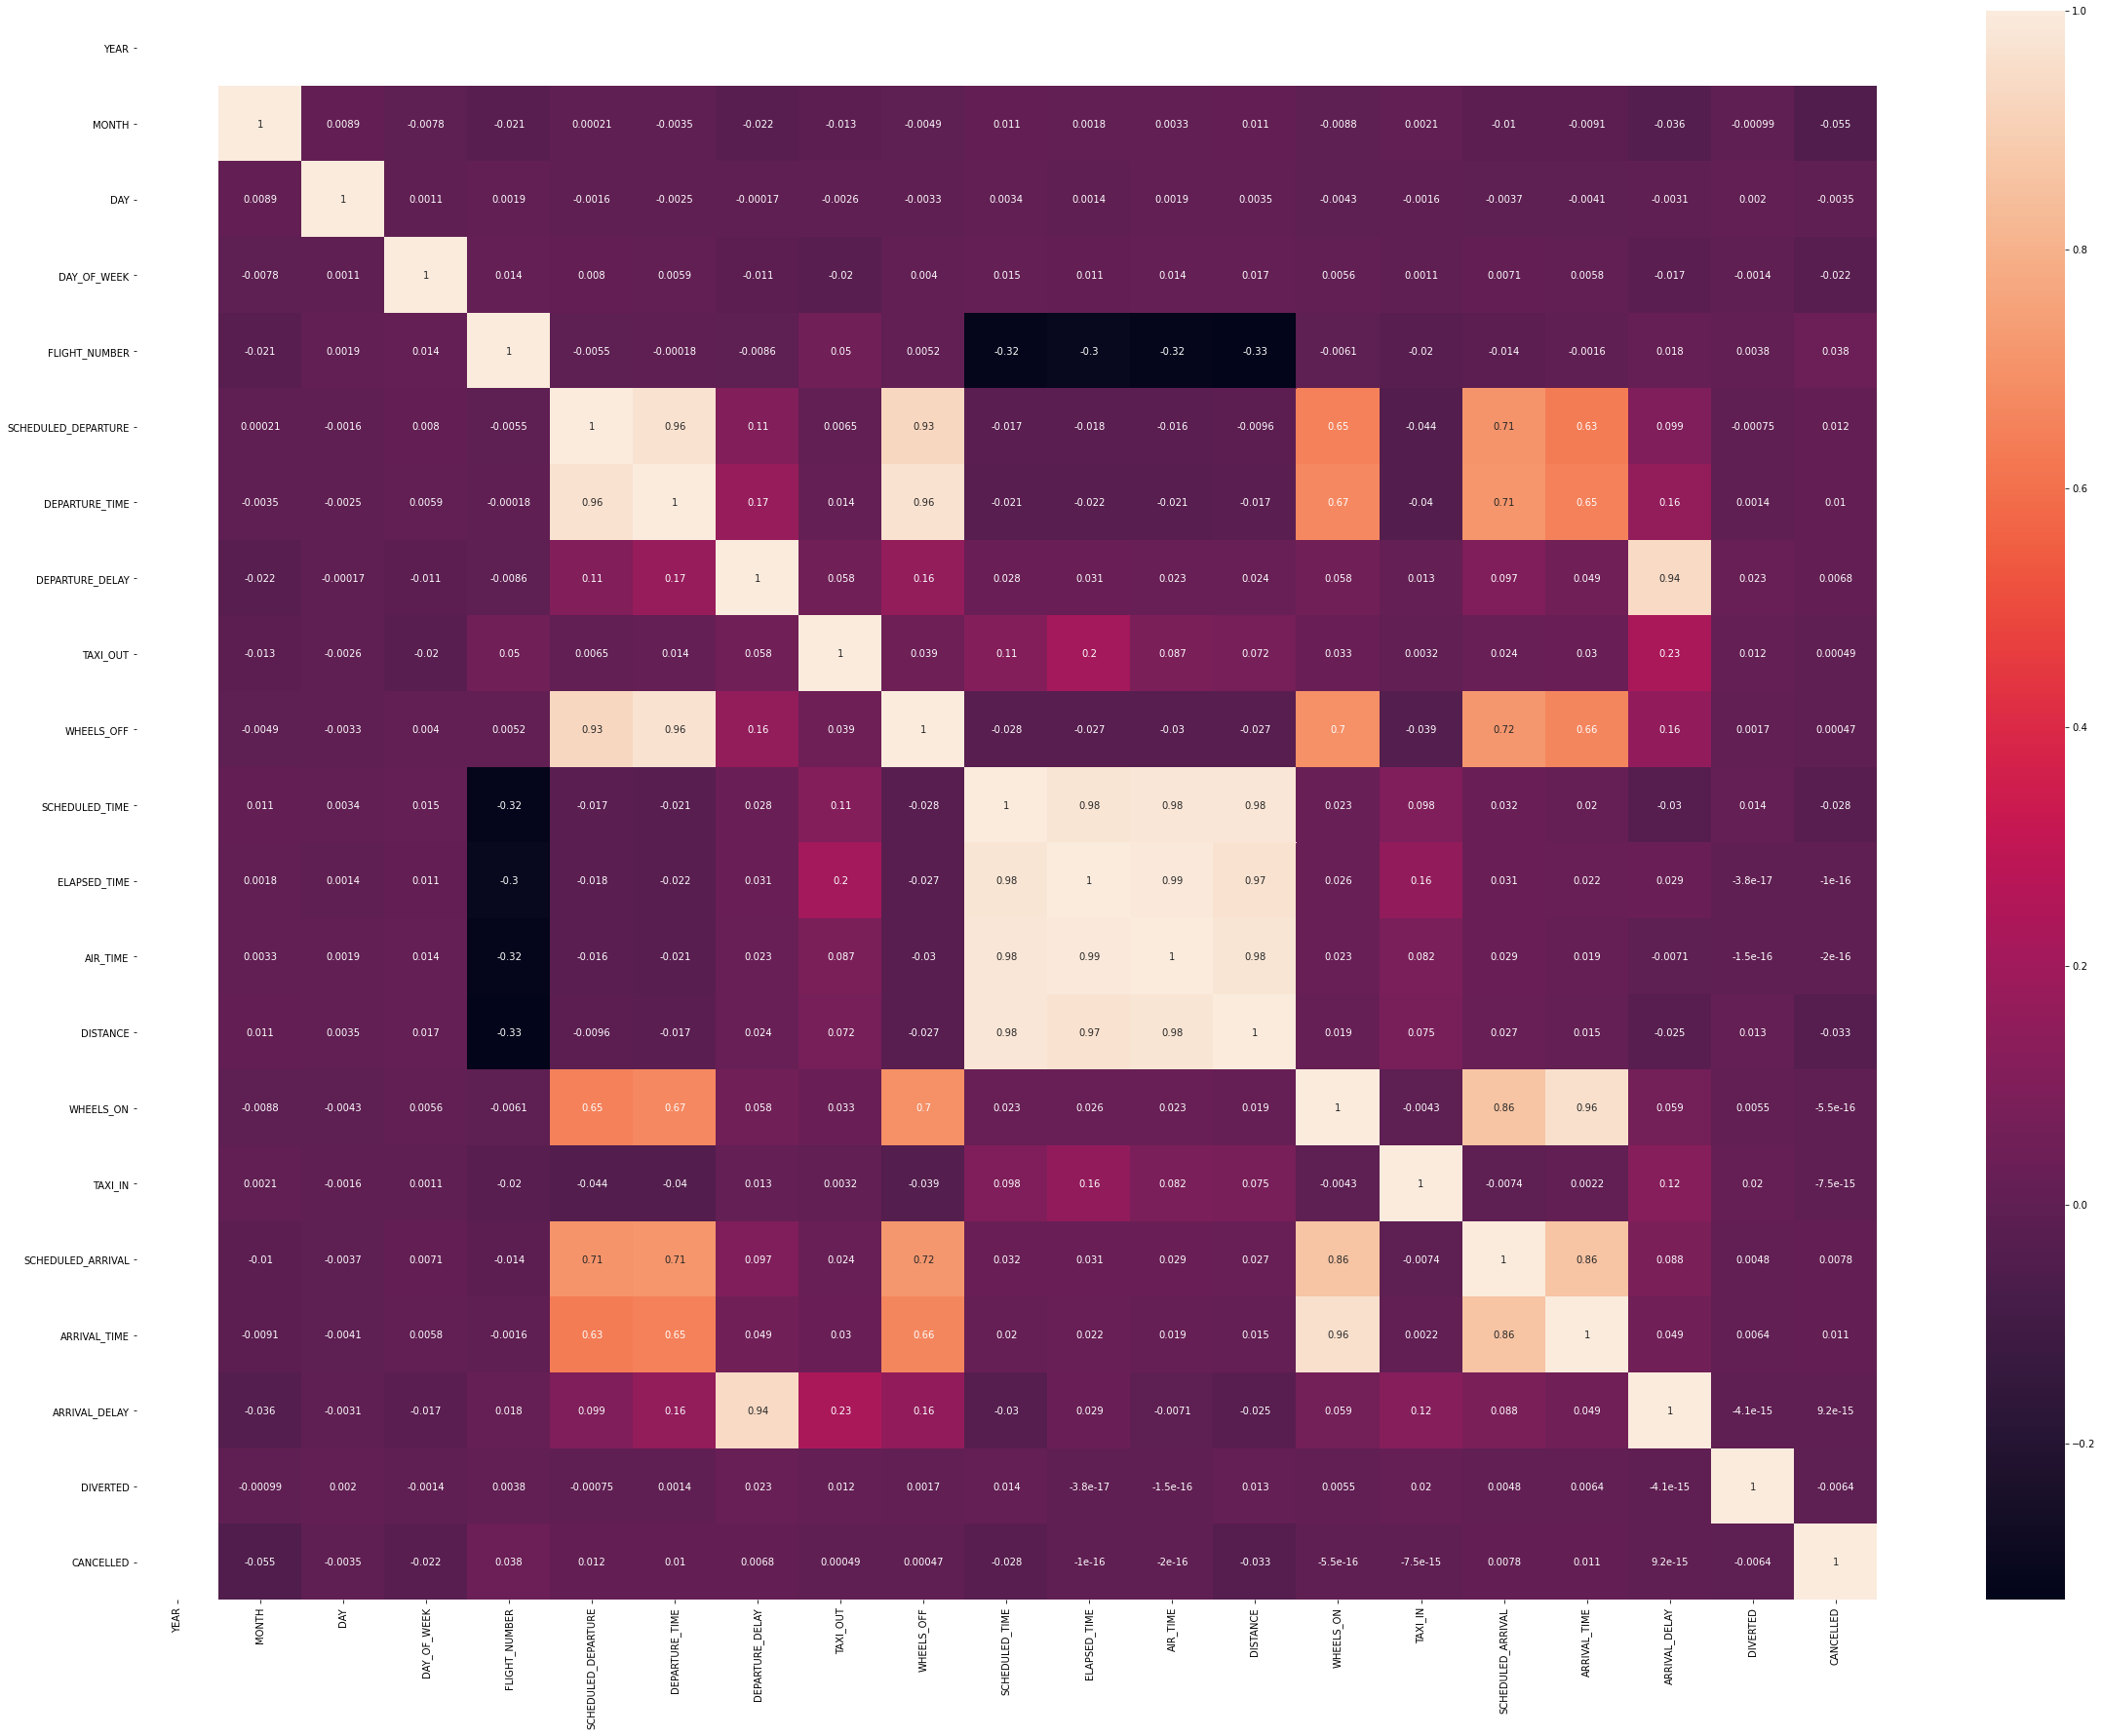

In [31]:
# ploting heat map to check correlation of numeric variables
plt.figure(figsize = (40,30))   
corr_matric= flight_df.corr()
sns.heatmap(corr_matric,annot=True,fmt='.2g')
plt.show()

 - Filter the dataset to eliminate columns that are'nt relevent for predictive modeling
 - Columns like:
     - AIRLINE
     - FLIGHT_NUMBER
     - TAIL_NUMBER
     - DEPARTURE_TIME
     - DEPARTURE_DELAY
     - TAXI_OUT
     - WHEELS_OFF
     - SCHEDULED_TIME
     - ELAPSED_TIME
     - AIR_TIME
     - DISTANCE
     - WHEELS_ON
     - TAXI_IN
     - SCHEDULED_ARRIVAL
     - ARRIVAL_TIME	
     - DIVERTED
     - CANCELLED

In [32]:
flight_df = flight_df.drop(["AIRLINE","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","DEPARTURE_DELAY","TAXI_OUT", 
                            "WHEELS_OFF","SCHEDULED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE","WHEELS_ON","TAXI_IN", 
                            "SCHEDULED_ARRIVAL","ARRIVAL_TIME","DIVERTED","AIR_TIME","CANCELLED"], axis = 1)

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 9 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   ARRIVAL_DELAY        float64       
 8   DATE                 datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 399.6+ MB


In [33]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01


In [34]:
#FEATURE GENERATION FROM ARRIVAL_DELAY, USING IF ELSE STATEMENT:
flight_df['RESULT']=flight_df['ARRIVAL_DELAY'].apply(lambda x: 1 if x>15 else 0)
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE,RESULT
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01,0
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01,0
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01,0
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01,0
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01,0


In [35]:
flight_df.RESULT.value_counts()

0    4795581
1    1023498
Name: RESULT, dtype: int64

In [36]:
flight_df.SCHEDULED_DEPARTURE.value_counts()

600    109943
700     82910
800     51875
630     39473
900     39419
        ...  
345         1
344         1
337         1
303         1
358         1
Name: SCHEDULED_DEPARTURE, Length: 1321, dtype: int64

# Checking for waether dataset

In [37]:
w_df = pd.read_csv("weather2.csv")
w_df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,NaN,0.00,0.0,3.1,18,30,11,330,330.0,19.9,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,NaN,0.00,0.0,3.1,17,28,6,160,160.0,16.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,NaN,0.00,0.1,3.1,26,33,12,350,340.0,29.1,35.1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,NaN,0.00,0.0,3.1,5,12,-7,340,340.0,25.9,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,NaN,0.06,0.5,3.1,-7,1,-11,240,280.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [38]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PGTM     0 non-null      float64
 5   PRCP     730 non-null    float64
 6   SNOW     365 non-null    float64
 7   SNWD     365 non-null    float64
 8   TAVG     730 non-null    int64  
 9   TMAX     730 non-null    int64  
 10  TMIN     730 non-null    int64  
 11  WDF2     730 non-null    int64  
 12  WDF5     725 non-null    float64
 13  WSF2     730 non-null    float64
 14  WSF5     725 non-null    float64
 15  WT01     240 non-null    float64
 16  WT02     8 non-null      float64
 17  WT03     50 non-null     float64
 18  WT04     4 non-null      float64
 19  WT05     0 non-null      float64
 20  WT06     4 non-null      float64
 21  WT08     143 non

In [39]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((w_df.isnull().sum()  / w_df.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [40]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
PGTM,100.000
WT05,100.000
WT06,99.452
WT04,99.452
WT09,99.315
WT02,98.904
WT03,93.151
WT08,80.411
WT01,67.123
SNOW,50.000


In [41]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index

Index(['PGTM', 'SNOW', 'SNWD', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09'], dtype='object')

In [42]:
# drop the columns which having more than 40% missing values
w_df=w_df.drop(columnstodrop.index,axis=1)

In [43]:
# check the missing value percentage 
df_missing=pd.DataFrame((w_df.isnull().sum()  / w_df.shape[0] *100).round(3),columns=['Percentage'])
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
WDF5,0.685
WSF5,0.685
STATION,0.000
NAME,0.000
DATE,0.000
AWND,0.000
PRCP,0.000
TAVG,0.000
TMAX,0.000
TMIN,0.000


In [44]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PRCP     730 non-null    float64
 5   TAVG     730 non-null    int64  
 6   TMAX     730 non-null    int64  
 7   TMIN     730 non-null    int64  
 8   WDF2     730 non-null    int64  
 9   WDF5     725 non-null    float64
 10  WSF2     730 non-null    float64
 11  WSF5     725 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 68.6+ KB


In [45]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       5
WSF2       0
WSF5       5
dtype: int64

In [46]:
w_df['WSF5'].fillna(w_df['WSF5'].mean(),inplace=True)

In [47]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       5
WSF2       0
WSF5       0
dtype: int64

In [48]:
w_df['WDF5'].fillna(w_df['WDF5'].mean(),inplace=True)

In [49]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64

In [50]:
w_df

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,0.00,18,30,11,330,330.0,19.9,25.9
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,0.00,17,28,6,160,160.0,16.1,19.0
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,0.00,26,33,12,350,340.0,29.1,35.1
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,0.00,5,12,-7,340,340.0,25.9,34.0
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,0.06,-7,1,-11,240,280.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,42,48,34,90,90.0,15.0,17.0
726,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,44,48,41,10,10.0,13.0,15.0
727,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,44,54,36,250,250.0,12.1,13.0
728,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,46,49,40,60,360.0,16.1,18.1


In [51]:
w_df.DATE

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
725    2015-12-27
726    2015-12-28
727    2015-12-29
728    2015-12-30
729    2015-12-31
Name: DATE, Length: 730, dtype: object

In [52]:
#object to datetime
w_df['DATE']= pd.to_datetime(w_df['DATE'])

In [53]:
w_df.DATE

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
725   2015-12-27
726   2015-12-28
727   2015-12-29
728   2015-12-30
729   2015-12-31
Name: DATE, Length: 730, dtype: datetime64[ns]

# MERGING

In [54]:
flight_df1=flight_df.sample(n=1000)

In [55]:
w_df

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,0.00,18,30,11,330,330.0,19.9,25.9
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,0.00,17,28,6,160,160.0,16.1,19.0
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,0.00,26,33,12,350,340.0,29.1,35.1
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,0.00,5,12,-7,340,340.0,25.9,34.0
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,0.06,-7,1,-11,240,280.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,42,48,34,90,90.0,15.0,17.0
726,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,44,48,41,10,10.0,13.0,15.0
727,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,44,54,36,250,250.0,12.1,13.0
728,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,46,49,40,60,360.0,16.1,18.1


In [56]:
final_df=pd.merge(flight_df1, w_df, how ='inner', on ='DATE')

In [57]:
final_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
ARRIVAL_DELAY          0
DATE                   0
RESULT                 0
STATION                0
NAME                   0
AWND                   0
PRCP                   0
TAVG                   0
TMAX                   0
TMIN                   0
WDF2                   0
WDF5                   0
WSF2                   0
WSF5                   0
dtype: int64

In [58]:
num_cols=final_df.select_dtypes(include='number').columns
cat_cols=final_df.select_dtypes(include='O').columns

In [59]:
num_cols

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'ARRIVAL_DELAY', 'RESULT', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], dtype='object')

In [60]:
cat_cols

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'STATION', 'NAME'], dtype='object')

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 2000 non-null   int64         
 1   MONTH                2000 non-null   int64         
 2   DAY                  2000 non-null   int64         
 3   DAY_OF_WEEK          2000 non-null   int64         
 4   ORIGIN_AIRPORT       2000 non-null   object        
 5   DESTINATION_AIRPORT  2000 non-null   object        
 6   SCHEDULED_DEPARTURE  2000 non-null   int64         
 7   ARRIVAL_DELAY        2000 non-null   float64       
 8   DATE                 2000 non-null   datetime64[ns]
 9   RESULT               2000 non-null   int64         
 10  STATION              2000 non-null   object        
 11  NAME                 2000 non-null   object        
 12  AWND                 2000 non-null   float64       
 13  PRCP                 2000 non-nul

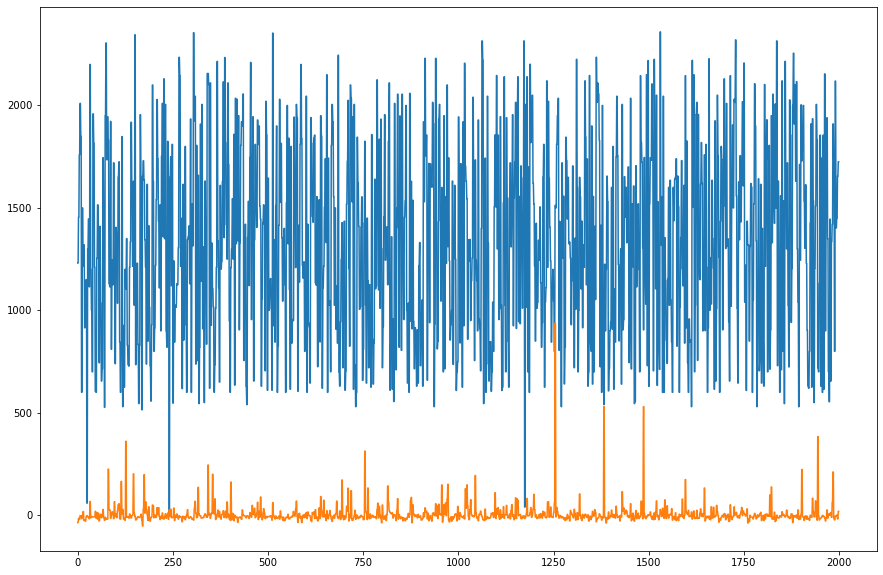

In [62]:
plt.figure(figsize=(15,10))
final_df['SCHEDULED_DEPARTURE'].plot()
final_df['ARRIVAL_DELAY'].plot()
plt.show()

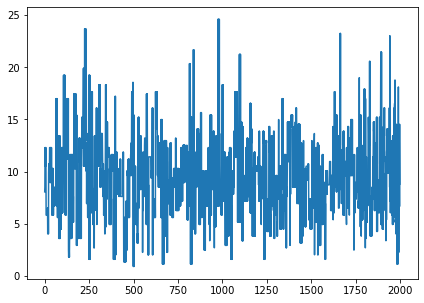

In [63]:
plt.figure(figsize=(7,5))
final_df['AWND'].plot()
plt.show()

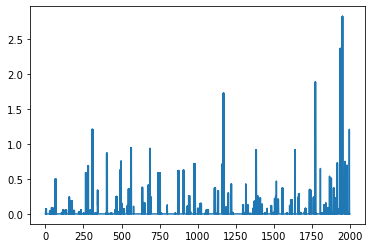

In [64]:
final_df['PRCP'].plot()
plt.show()

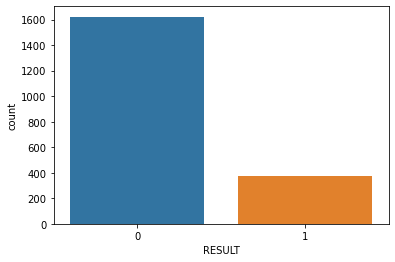

In [65]:
sns.countplot(final_df['RESULT'])
plt.show()

In [66]:
final_df['RESULT'].value_counts(normalize=True)*100

0    81.1
1    18.9
Name: RESULT, dtype: float64

In [67]:
final_df.drop(columns=['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DATE'],axis=1,inplace=True)

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   ARRIVAL_DELAY        2000 non-null   float64
 6   RESULT               2000 non-null   int64  
 7   STATION              2000 non-null   object 
 8   NAME                 2000 non-null   object 
 9   AWND                 2000 non-null   float64
 10  PRCP                 2000 non-null   float64
 11  TAVG                 2000 non-null   int64  
 12  TMAX                 2000 non-null   int64  
 13  TMIN                 2000 non-null   int64  
 14  WDF2                 2000 non-null   int64  
 15  WDF5                 2000 non-null   f

In [69]:
final_df.drop(columns=['ARRIVAL_DELAY'],axis=1,inplace=True)

In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   RESULT               2000 non-null   int64  
 6   STATION              2000 non-null   object 
 7   NAME                 2000 non-null   object 
 8   AWND                 2000 non-null   float64
 9   PRCP                 2000 non-null   float64
 10  TAVG                 2000 non-null   int64  
 11  TMAX                 2000 non-null   int64  
 12  TMIN                 2000 non-null   int64  
 13  WDF2                 2000 non-null   int64  
 14  WDF5                 2000 non-null   float64
 15  WSF2                 2000 non-null   f

In [71]:
final_df.drop(columns=['STATION','NAME'],axis=1,inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   RESULT               2000 non-null   int64  
 6   AWND                 2000 non-null   float64
 7   PRCP                 2000 non-null   float64
 8   TAVG                 2000 non-null   int64  
 9   TMAX                 2000 non-null   int64  
 10  TMIN                 2000 non-null   int64  
 11  WDF2                 2000 non-null   int64  
 12  WDF5                 2000 non-null   float64
 13  WSF2                 2000 non-null   float64
 14  WSF5                 2000 non-null   float64
dtypes: float64(5), int64(10)
memory usage:

# Modeling and Spliting of the dataset in X and y

In [72]:
X=final_df.drop(columns=['RESULT'],axis=1)
y=final_df['RESULT']

In [73]:
X

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2015,8,28,5,1231,8.05,0.00,69,76,59,160,170.000000,19.9,27.100000
1,2015,8,28,5,1231,8.50,0.00,72,93,64,290,226.496552,23.9,26.630621
2,2015,4,18,6,1455,12.30,0.07,62,73,47,100,110.000000,21.0,27.100000
3,2015,4,18,6,1455,10.51,0.00,55,67,49,290,290.000000,21.9,25.900000
4,2015,4,18,6,1759,12.30,0.07,62,73,47,100,110.000000,21.0,27.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,7,21,2,1450,13.42,0.00,64,70,60,260,270.000000,23.0,30.000000
1996,2015,11,17,2,1654,12.75,1.21,50,55,49,120,120.000000,23.9,32.000000
1997,2015,11,17,2,1654,8.72,0.00,55,61,50,280,280.000000,21.0,23.900000
1998,2015,2,17,2,1725,14.54,0.00,8,10,-2,320,310.000000,25.1,32.000000


In [74]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: RESULT, Length: 2000, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

# Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,auc

## Importing the metrics for classification by using sklearn metrics 

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(X_train_sc,y_train)

LogisticRegression()

### Train Model

In [79]:
y_pred_trainlr1 =Lr.predict(X_train_sc)

In [80]:
y_pred_trainlr1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
Lr.score(X_train_sc,y_train)

0.81

In [82]:
confusion_matrix(y_train, y_pred_trainlr1)

array([[1129,    5],
       [ 261,    5]], dtype=int64)

In [83]:
print(classification_report(y_train, y_pred_trainlr1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1134
           1       0.50      0.02      0.04       266

    accuracy                           0.81      1400
   macro avg       0.66      0.51      0.47      1400
weighted avg       0.75      0.81      0.73      1400



### Test Model

In [84]:
y_pred_testlr1 =Lr.predict(X_test_sc)

In [85]:
y_pred_testlr1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
Lr.score(X_test_sc,y_test)

0.8066666666666666

In [87]:
confusion_matrix(y_test, y_pred_testlr1)

array([[483,   5],
       [111,   1]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred_testlr1))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       488
           1       0.17      0.01      0.02       112

    accuracy                           0.81       600
   macro avg       0.49      0.50      0.45       600
weighted avg       0.69      0.81      0.73       600



In [89]:
X_test_sc[0]

array([ 0.        , -0.15748636,  1.42108115,  1.56936876,  0.62834592,
       -0.81012436,  0.20759041,  0.99370932,  1.05549019,  1.01815137,
       -2.21452454, -2.03227089,  0.66257272,  0.4313705 ])

# Saving and Calling Model for Checking result

In [90]:
import pickle

# Saving model to disk
pickle.dump(Lr, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[ 0.        , -0.54098308,  1.29306136, -0.41525981, -1.06344096,
       -0.99334969, -0.27313505,  0.60950332,  1.17473456,  0.45019607,
        0.31370881,  0.11631837, -0.96424447, -0.9179752]]))

[0]


# *****END*****